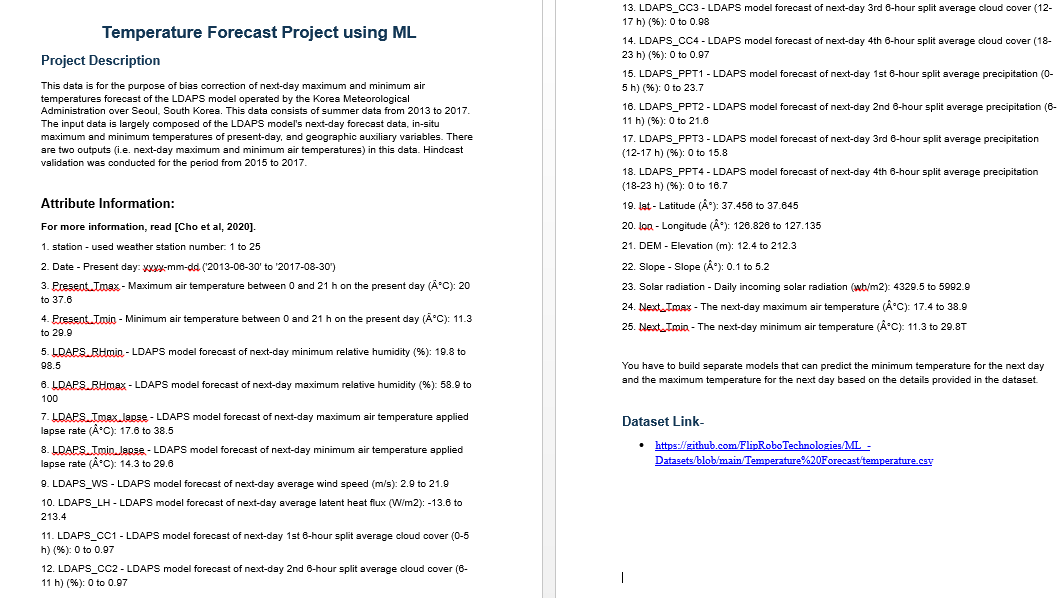
Dataset Link-
•	https://github.com/FlipRoboTechnologies/ML_-Datasets/blob/main/Temperature%20Forecast/temperature.csv


In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings ('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score




In [102]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Temperature%20Forecast/temperature.csv')
df.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [29]:
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [29]:
# Here we can see null value in station & date column 7750 & 7751

In [30]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [103]:
# Get the indices of NaN values

for idx, col in enumerate(df.columns):
    if idx <= 25:
        nan_indices = np.where(df[col].isna())
        print(f"NaN values in column '{col}' at indices: {nan_indices}")



NaN values in column 'station' at indices: (array([7750, 7751], dtype=int64),)
NaN values in column 'Date' at indices: (array([7750, 7751], dtype=int64),)
NaN values in column 'Present_Tmax' at indices: (array([ 225,  271,  300,  450,  464,  627,  856,  881,  913,  945,  975,
       1098, 1123, 2490, 2918, 3383, 3718, 3721, 3739, 3764, 3886, 3911,
       4061, 4208, 4220, 4230, 4255, 4280, 4305, 4738, 5208, 5583, 5681,
       5706, 6060, 6085, 6208, 6210, 6211, 6213, 6214, 6218, 6219, 6220,
       6223, 6253, 6293, 6311, 6340, 6357, 6360, 6373, 6382, 6460, 6662,
       6932, 7032, 7112, 7279, 7304, 7329, 7369, 7429, 7529, 7563, 7579,
       7596, 7605, 7629, 7707], dtype=int64),)
NaN values in column 'Present_Tmin' at indices: (array([ 225,  271,  300,  450,  464,  627,  856,  881,  913,  945,  975,
       1098, 1123, 2490, 2918, 3383, 3718, 3721, 3739, 3764, 3886, 3911,
       4061, 4208, 4220, 4230, 4255, 4280, 4305, 4738, 5208, 5583, 5681,
       5706, 6060, 6085, 6208, 6210, 6211, 

In [104]:
df['station'].iloc[7750]=1
df['station'].iloc[7751]=2
df['Date'].iloc[7750]='31-08-2017'
df['Date'].iloc[7751]='31-08-2017'

In [105]:
df.drop(columns=['lat','lon'],inplace=True)

In [106]:
for col in df.columns:
    if col not in ['station','Date']:
        df[col]=df[col].replace(np.nan,df[col].median())

In [107]:
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

In [108]:
df['Date']=pd.to_datetime(df['Date'])

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   station           7752 non-null   float64       
 1   Date              7752 non-null   datetime64[ns]
 2   Present_Tmax      7752 non-null   float64       
 3   Present_Tmin      7752 non-null   float64       
 4   LDAPS_RHmin       7752 non-null   float64       
 5   LDAPS_RHmax       7752 non-null   float64       
 6   LDAPS_Tmax_lapse  7752 non-null   float64       
 7   LDAPS_Tmin_lapse  7752 non-null   float64       
 8   LDAPS_WS          7752 non-null   float64       
 9   LDAPS_LH          7752 non-null   float64       
 10  LDAPS_CC1         7752 non-null   float64       
 11  LDAPS_CC2         7752 non-null   float64       
 12  LDAPS_CC3         7752 non-null   float64       
 13  LDAPS_CC4         7752 non-null   float64       
 14  LDAPS_PPT1        7752 n

In [110]:
# Convert 'Date' to a numeric representation, such as the number of seconds since the epoch
df['Date'] = df['Date'].astype('int64') // 10**9

df.head(3)

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,1372550400,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,1372550400,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,1372550400,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9


In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7752 non-null   float64
 1   Date              7752 non-null   int64  
 2   Present_Tmax      7752 non-null   float64
 3   Present_Tmin      7752 non-null   float64
 4   LDAPS_RHmin       7752 non-null   float64
 5   LDAPS_RHmax       7752 non-null   float64
 6   LDAPS_Tmax_lapse  7752 non-null   float64
 7   LDAPS_Tmin_lapse  7752 non-null   float64
 8   LDAPS_WS          7752 non-null   float64
 9   LDAPS_LH          7752 non-null   float64
 10  LDAPS_CC1         7752 non-null   float64
 11  LDAPS_CC2         7752 non-null   float64
 12  LDAPS_CC3         7752 non-null   float64
 13  LDAPS_CC4         7752 non-null   float64
 14  LDAPS_PPT1        7752 non-null   float64
 15  LDAPS_PPT2        7752 non-null   float64
 16  LDAPS_PPT3        7752 non-null   float64


In [112]:
corr=df.corr()
corr

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
station,1.000000,-0.000606,0.112733,0.132000,-0.066727,-0.166334,0.069363,0.105053,0.004353,-0.133693,...,0.005849,-0.004990,-0.010555,-0.015051,-0.013033,-0.256095,-0.090413,-0.018787,0.108207,0.128635
Date,-0.000606,1.000000,0.062048,0.038296,-0.009034,-0.146086,0.016332,-0.007076,-0.114577,0.059150,...,0.099437,-0.089524,-0.044206,0.051116,0.038219,0.000354,0.000383,-0.041660,0.061025,0.021831
Present_Tmax,0.112733,0.062048,1.000000,0.618769,-0.205341,-0.300261,0.570287,0.624229,-0.123565,0.134216,...,-0.142549,-0.111148,-0.101362,-0.122051,-0.101118,-0.187138,-0.105884,-0.025401,0.610256,0.622700
Present_Tmin,0.132000,0.038296,0.618769,1.000000,0.121800,-0.012659,0.464420,0.764239,-0.037682,-0.011331,...,-0.047496,0.109085,0.064851,-0.049017,-0.065550,-0.250299,-0.146460,0.053638,0.471723,0.796657
LDAPS_RHmin,-0.066727,-0.009034,-0.205341,0.121800,1.000000,0.578770,-0.564575,0.089346,0.294537,-0.070654,...,0.514163,0.262875,0.391110,0.240831,0.168797,0.102108,0.123736,0.244643,-0.439171,0.094061
LDAPS_RHmax,-0.166334,-0.146086,-0.300261,-0.012659,0.578770,1.000000,-0.373274,-0.113914,0.134786,0.238183,...,0.130008,0.267698,0.228398,0.134087,0.117376,0.177134,0.219557,0.148259,-0.281282,-0.070193
LDAPS_Tmax_lapse,0.069363,0.016332,0.570287,0.464420,-0.564575,-0.373274,1.000000,0.654013,-0.311973,0.047954,...,-0.429456,-0.111105,-0.242113,-0.188133,-0.160300,-0.178895,-0.162332,0.047820,0.827473,0.587066
LDAPS_Tmin_lapse,0.105053,-0.007076,0.624229,0.764239,0.089346,-0.113914,0.654013,1.000000,-0.130245,-0.134906,...,-0.080587,0.037727,0.000588,-0.088791,-0.094855,-0.195445,-0.185839,0.159445,0.588224,0.881074
LDAPS_WS,0.004353,-0.114577,-0.123565,-0.037682,0.294537,0.134786,-0.311973,-0.130245,1.000000,0.007115,...,0.221066,0.153213,0.192427,0.162173,0.144550,0.190995,0.171577,0.122966,-0.345578,-0.098730
LDAPS_LH,-0.133693,0.059150,0.134216,-0.011331,-0.070654,0.238183,0.047954,-0.134906,0.007115,1.000000,...,-0.172222,-0.012042,-0.077061,0.016483,0.020332,0.055126,0.086770,-0.046553,0.155684,-0.056832


<Axes: >

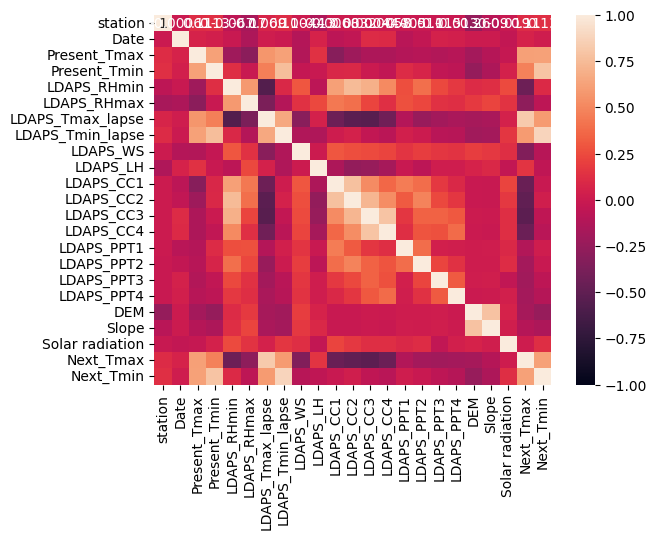

In [78]:
sns.heatmap(corr,vmin=-1,vmax=1,annot=True)

In [81]:
s


NameError: name 's' is not defined

In [113]:
df.skew()

station             0.000182
Date                0.000265
Present_Tmax       -0.265337
Present_Tmin       -0.369481
LDAPS_RHmin         0.303565
LDAPS_RHmax        -0.860210
LDAPS_Tmax_lapse   -0.228767
LDAPS_Tmin_lapse   -0.584737
LDAPS_WS            1.584975
LDAPS_LH            0.678315
LDAPS_CC1           0.465003
LDAPS_CC2           0.477041
LDAPS_CC3           0.646670
LDAPS_CC4           0.673700
LDAPS_PPT1          5.395178
LDAPS_PPT2          5.776835
LDAPS_PPT3          6.458608
LDAPS_PPT4          6.826930
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.340943
Next_Tmin          -0.405143
dtype: float64

In [114]:
from scipy.stats import zscore

z_score =zscore(df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS']])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
df=df[filtering_entry]
df.reset_index(inplace=True)

In [115]:
df.head(3)

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,0,1.0,1372550400,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,...,0.130928,0.0,0.0,0.0,0.0,212.3350,2.7850,5992.895996,29.1,21.2
1,1,2.0,1372550400,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,...,0.127727,0.0,0.0,0.0,0.0,44.7624,0.5141,5869.312500,30.5,22.5
2,2,3.0,1372550400,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,...,0.142125,0.0,0.0,0.0,0.0,33.3068,0.2661,5863.555664,31.1,23.9


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7508 entries, 0 to 7507
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             7508 non-null   int64  
 1   station           7508 non-null   float64
 2   Date              7508 non-null   int64  
 3   Present_Tmax      7508 non-null   float64
 4   Present_Tmin      7508 non-null   float64
 5   LDAPS_RHmin       7508 non-null   float64
 6   LDAPS_RHmax       7508 non-null   float64
 7   LDAPS_Tmax_lapse  7508 non-null   float64
 8   LDAPS_Tmin_lapse  7508 non-null   float64
 9   LDAPS_WS          7508 non-null   float64
 10  LDAPS_LH          7508 non-null   float64
 11  LDAPS_CC1         7508 non-null   float64
 12  LDAPS_CC2         7508 non-null   float64
 13  LDAPS_CC3         7508 non-null   float64
 14  LDAPS_CC4         7508 non-null   float64
 15  LDAPS_PPT1        7508 non-null   float64
 16  LDAPS_PPT2        7508 non-null   float64


In [117]:
df.skew()

index               0.000797
station             0.007782
Date                0.010456
Present_Tmax       -0.230063
Present_Tmin       -0.217252
LDAPS_RHmin         0.286785
LDAPS_RHmax        -0.755610
LDAPS_Tmax_lapse   -0.098432
LDAPS_Tmin_lapse   -0.384715
LDAPS_WS            1.026174
LDAPS_LH            0.677097
LDAPS_CC1           0.487881
LDAPS_CC2           0.477352
LDAPS_CC3           0.647956
LDAPS_CC4           0.682867
LDAPS_PPT1          5.286778
LDAPS_PPT2          5.739820
LDAPS_PPT3          6.717510
LDAPS_PPT4          6.831310
DEM                 1.777702
Slope               1.602993
Solar radiation    -0.503397
Next_Tmax          -0.269530
Next_Tmin          -0.267037
dtype: float64

In [123]:
# Assuming x and y are your DataFrames for features and targets respectively
x = df.drop(['Next_Tmax', 'Next_Tmin'], axis=1)  # Features without target columns
y = df[['Next_Tmax', 'Next_Tmin']]  # Target columns

In [124]:
# Iterate through columns and transform based on skewness
for col in x.columns:
    if x[col].skew() > 0.5:
        x[col] = np.cbrt(x[col])  # Cube root transformation
    elif x[col].skew() < -0.5:
        x[col] = np.power(x[col], 3)  # Cube transformation (assuming x[col] is positive)

# Check skewness after transformation
skewness_after_transform = x.skew()
print("Skewness after transformation:\n", skewness_after_transform)

Skewness after transformation:
 index               0.000797
station             0.007782
Date                0.010456
Present_Tmax       -0.230063
Present_Tmin       -0.217252
LDAPS_RHmin         0.286785
LDAPS_RHmax        -0.419466
LDAPS_Tmax_lapse   -0.098432
LDAPS_Tmin_lapse   -0.384715
LDAPS_WS            0.574715
LDAPS_LH           -0.280014
LDAPS_CC1           0.487881
LDAPS_CC2           0.477352
LDAPS_CC3          -0.565291
LDAPS_CC4          -0.450584
LDAPS_PPT1          1.990867
LDAPS_PPT2          2.322561
LDAPS_PPT3          2.643657
LDAPS_PPT4          2.959830
DEM                 0.942358
Slope               0.627590
Solar radiation    -0.320299
dtype: float64


In [126]:
Scaler=StandardScaler()

X=Scaler.fit_transform(x)
X=pd.DataFrame(X,columns=x.columns)
X

,index,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,...,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,DEM,Slope,Solar radiation
0,-1.726822,-1.667486,-1.461217,-0.388751,-0.831609,0.109151,0.329539,-0.590753,-0.279330,0.015098,...,-0.584980,-0.316481,-0.356556,-0.550965,-0.501088,-0.477806,-0.418651,2.374530,1.299552,1.704308
1,-1.726374,-1.528555,-1.461217,0.719259,-0.744937,-0.307678,0.247160,0.040464,0.187152,-0.661389,...,-0.397452,-0.328074,-0.374473,-0.550965,-0.501088,-0.477806,-0.418651,-0.133136,-0.410840,1.331132
2,-1.725925,-1.389624,-1.461217,0.615384,-0.008231,-0.556213,-0.738694,0.125950,0.427920,-0.383640,...,-0.375132,-0.115953,-0.296088,-0.550965,-0.501088,-0.477806,-0.418651,-0.479063,-0.856583,1.314126
3,-1.725477,-1.250693,-1.461217,0.753885,0.035105,0.108045,1.250789,-0.011431,-0.134476,-0.688161,...,-0.498388,-0.319247,-0.338276,-0.550965,-0.501088,-0.477806,-0.418651,-0.107141,1.176855,1.294697
4,-1.725029,-1.111762,-1.461217,0.546133,-0.614930,-0.035646,0.175536,-0.221303,-0.061740,-0.633939,...,-0.404408,-0.231354,-0.158135,-0.550965,-0.501088,-0.477806,-0.418651,-0.422160,-0.423521,1.302319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7503,1.744899,1.111133,1.478603,-2.327769,-2.391693,-2.225776,-1.472038,-0.683630,-2.413709,-0.108230,...,-1.265467,-2.801142,-1.834502,-0.550965,-0.501088,-0.477806,-0.418651,-0.732059,-0.328801,-1.922364
7504,1.745347,1.250064,1.478603,-2.535521,-2.565036,-1.849740,-0.777560,-1.077226,-2.635579,-0.612972,...,-1.287599,-2.762999,-1.418448,-0.550965,-0.501088,-0.477806,-0.418651,-0.911827,-1.230652,-1.946524
7505,1.745796,1.388995,1.478603,-2.258518,-2.695043,-2.083015,-1.398788,-1.202583,-2.199240,-0.377153,...,-1.066224,-2.801142,-2.537107,-0.550965,-0.501088,-0.477806,-0.418651,-1.226032,-1.154631,-1.943965
7506,1.746244,1.527926,1.478603,-2.258518,-2.435029,-2.270876,-1.586057,-0.968757,-2.218370,-0.143275,...,-1.090011,-2.801142,-2.537107,-0.550965,-0.501088,-0.477806,-0.418651,-1.134565,-0.962241,-1.952328


In [127]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression


In [128]:
# Creating Train test split

maxAcc=0
maxRS=0
for i in range ( 1, 200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print('Max r2_scoer: ',maxAcc,'on random state: ',maxRS)


Max r2_scoer:  0.8024187909495928 on random state:  168


In [129]:
# here Max r2_scoer:  0.8024187909495928 which can not be possible in real life. It is may be due to overfitting, data leackage

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

ExtraTreesRegressor()
R2_Score: 0.9119744971452596
R2 Score on traing data:  1.0
Mean absulute error: 0.5976415889924547
Mean scuared error: : 0.6484394844651564
Root Mean scuared error: : 0.8052574026143171


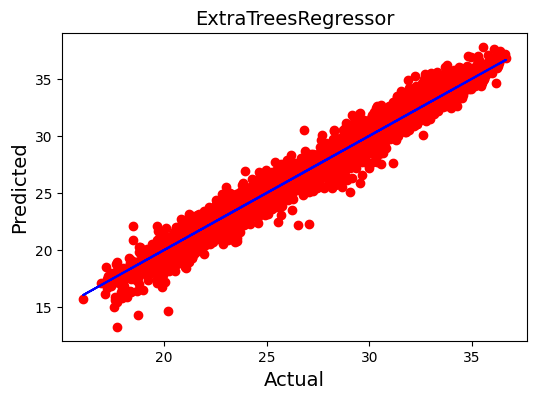

In [130]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr=etr.predict(x_test)
pred_Train=etr.predict(x_train)
print(etr)
print('R2_Score:', r2_score(y_test,pred_etr))
print('R2 Score on traing data: ', r2_score(y_train,pred_Train))
print('Mean absulute error:', mean_absolute_error(y_test,pred_etr))
print('Mean scuared error: :', mean_squared_error(y_test,pred_etr))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_etr)))


plt.figure(figsize=(6,4))
plt.scatter(x=pred_etr,y=y_test,color='red')
plt.plot(pred_etr,pred_etr,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('ExtraTreesRegressor',fontsize=14)
plt.show()

In [ ]:
#Hyperparameter tuning

In [135]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create GridSearchCV object
gscv = GridSearchCV(estimator=etr, param_grid=param_grid, cv=5)
gscv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [136]:
PR=gscv.best_params_
PR

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 300}

In [140]:
Model=ExtraTreesRegressor(max_depth= None,max_features= 'sqrt',min_samples_split= 2,n_estimators= 300)

In [141]:
Model.fit(x_train,y_train)
pred_Model=Model.predict(x_test)

print('R2_Score:', r2_score(y_test,pred_Model))

print('Mean absulute error:', mean_absolute_error(y_test,pred_Model))
print('Mean scuared error: :', mean_squared_error(y_test,pred_Model))
print('Root Mean scuared error: :', np.sqrt(mean_squared_error(y_test,pred_Model)))

R2_Score: 0.9124012670378048
Mean absulute error: 0.5943553040390597
Mean scuared error: : 0.6429186186072904
Root Mean scuared error: : 0.801822061686563


In [142]:
import joblib 

import pickle
filename='Temp.pk'
pickle.dump(Model,open(filename,'wb')) #saved the Model

In [143]:
loaded_Model=pickle.load(open('Temp.pk','rb'))
result=loaded_Model.score(x_test,y_test)
print(result*100)


91.24012670378048
